In [0]:
#@title
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Definieer wat waardes voor je k's
k1 = 100000000
k2 = 4000
k3 = 100000000
k4 = 1
k5 = 0
k6 = 0
kcat = 2.1

# Definieer de concentraties op T=0 (in eerste instantie: voor inhibitie of substraat)
E0 = 0.1*10**-9
ES0 = 0
P0 = 0
EI0 = 0
EIi0 = 0  #(EI*)

#Definieer constanten
Is = [100*10**-9, 50*10**-9, 25*10**-9, 15*10**-9, 7.5*10**-9, 4*10**-9, 2*10**-9, 1*10**-9, 0.5*10**-9, 0.25*10**-9, 0.1*10**-9, 0*10**-9] #lijst van concentraties
S0 = 4*10**-6
dt = 0.0001 #Dit is hoe groot je simulatie tijdstappen zijn

tframe = 60 #save a frame every 60 s
tincub = 0 #incubate for 1800 s
tsub = 1800 # Run with substrate for 1800 s

In [0]:
all_plots = []


for I in Is: # Loop over all I's
  concentraties = np.array([E0, ES0, P0, EI0, EIi0], dtype=np.double) #matrix van concentraties
  # Voor toevoeging van S

  S=0 # Geen S in je systeem

                          # [         E,       ES, P,     EI, EI*]
  tijdevolutie0 = np.array([[-k3*I-k1*S,  k2+kcat, 0,     k4,   0],  #E
                            [      k1*S, -k2-kcat, 0,      0,   0],  #ES
                            [         0,     kcat, 0,      0,   0],  #P
                            [      k3*I,        0, 0, -k4-k5,  k6],  #EI
                            [         0,        0, 0,     k5, -k6]]) #EI*

  #verandering in E   = [E]*(-k3*I-k1*S) + [ES]*(k2+kcat)  + [P]*(0) + [EI]*(k4)     + [EI*]*(0)
  #verandering in ES  = [E]*(k1*S)       + [ES]*(-k2-kcat) + [P]*(0) + [EI]*(0)      + [EI*]*(0)
  #verandering in P   = [E]*(0)          + [ES]*(kcat)     + [P]*(0) + [EI]*(0)      + [EI*]*(0)
  #verandering in EI  = [E]*(k3*I)       + [ES]*(0)        + [P]*(0) + [EI]*(-k4-k5) + [EI*]*(k6)
  #verandering in EI* = [E]*(0)          + [ES]*(0)        + [P]*(0) + [EI]*(k5)     + [EI*]*(-k6)


  #Na toevoeging van S
  S= S0
  tijdevolutie1 = np.array([[-k3*I-k1*S, k2+kcat, 0, k4, 0],
                           [k1*S, -k2-kcat, 0, 0, 0],
                           [0, kcat, 0, 0, 0],
                           [k3*I, 0, 0, -k4-k5, k6],
                           [0, 0, 0, k5, -k6]])
  # Maak een lijst van kopien van de concentraties
  plot = [concentraties.copy()]

  tijdconc = concentraties.copy()
  t = 0
  # Voor toevoging van S (tincub/dt stappen = 30min)
  for i in range(int(tincub/dt)):
      t+= 1
      tijdconc += np.dot(tijdevolutie0*dt, tijdconc) # Doe 1 dt tijdstap
      if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

      if t % int(tframe/dt)==0:
          plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst

  # Na toevoeging van S (tsub/dt stappen)
  for i in range(int(tsub/dt)):
      t += 1
      tijdconc += np.dot(tijdevolutie1*dt, tijdconc) #Doe 1 dt tijdstap
      if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

      if t % int(tframe/dt)==0:
          plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst

  all_plots.append(plot)

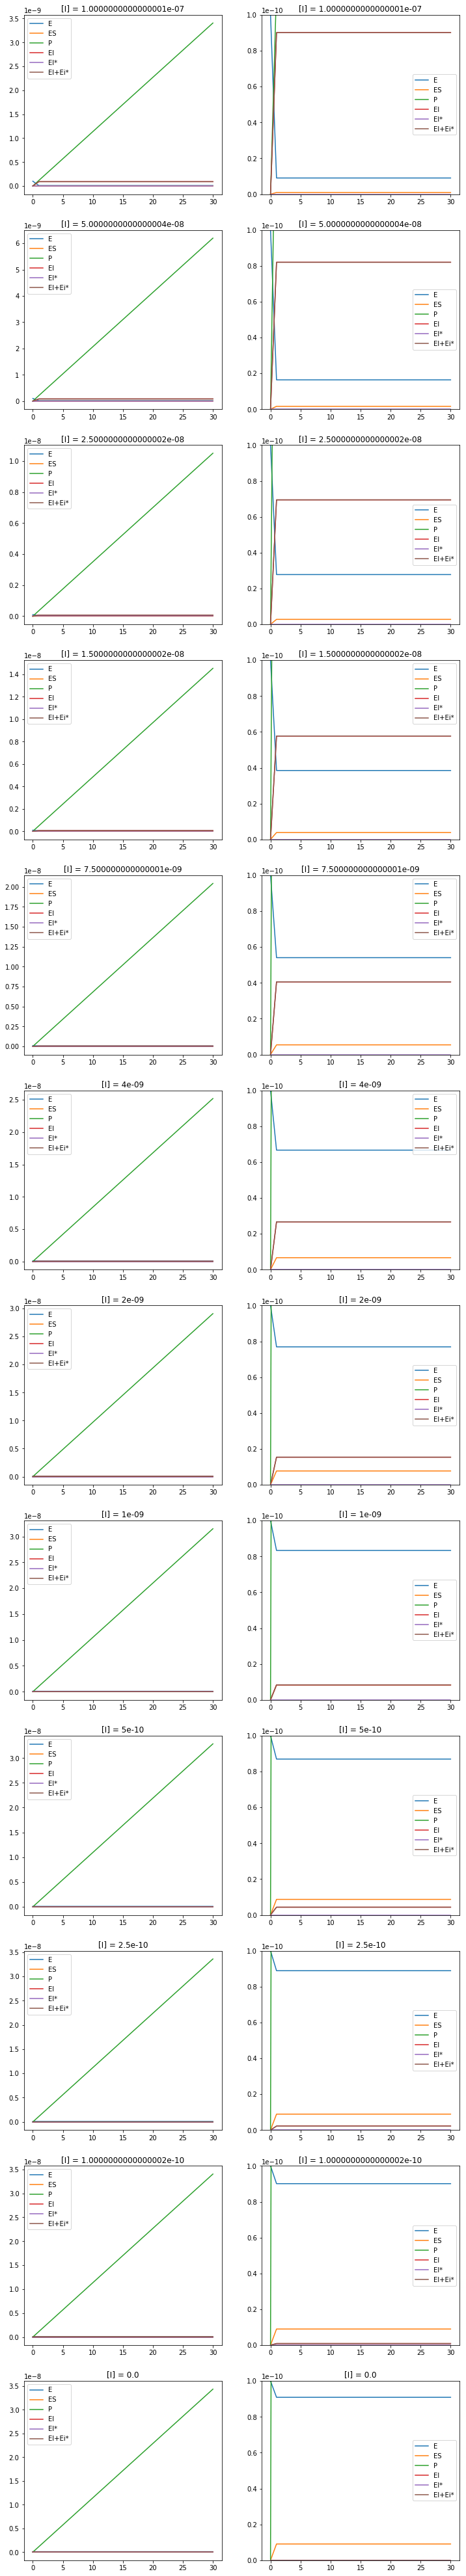

In [0]:
# This will make all the plots and dataframes
dataframes = []
fig, axes = plt.subplots(len(all_plots), 2, figsize=(12,len(all_plots)*6))
for n, plot in enumerate(all_plots):
  # Splits de lijst van figuren in E, ES, P, EI en EI*
  Eplot = [] 
  ESplot = []
  Pplot = []
  EIplot = []
  EIiplot = []
  EItot = []
  for frame in plot:
    Eplot.append(frame[0])
    ESplot.append(frame[1])
    Pplot.append(frame[2])
    EIplot.append(frame[3])
    EIiplot.append(frame[4])
    EItot.append(frame[3]+frame[4]) 
    
   # Plot de figuren
  labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
  for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    axes[n,0].plot(y, label=labels[i])
  axes[n,0].legend()
  for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
      axes[n,1].plot(y, label=labels[i])
  axes[n,1].legend()
  axes[n,1].set_ylim(0,E0) #zoom in tot E0
  axes[n,0].set_title("[I] = {}".format(str(Is[n])))
  axes[n,1].set_title("[I] = {}".format(str(Is[n])))
  
  df = pd.DataFrame(data={'E':Eplot,  "EI":EIplot, "EIi":EIiplot, "ES":ESplot, "P":Pplot})
  dataframes.append(df)
df = pd.concat(dataframes, keys=[I for I in Is], axis=1) # Combine all the dataframes

In [0]:
df
  

1.000000e-07                                                 5.000000e-08  \
               E            EI  EIi            ES             P             E   
0   1.000000e-10  0.000000e+00  0.0  0.000000e+00  0.000000e+00  1.000000e-10   
1   9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.151575e-10  1.639358e-11   
2   9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.286120e-10  1.639358e-11   
3   9.009052e-12  9.009052e-11  0.0  9.004324e-13  3.420665e-10  1.639358e-11   
4   9.009052e-12  9.009052e-11  0.0  9.004324e-13  4.555210e-10  1.639358e-11   
5   9.009052e-12  9.009052e-11  0.0  9.004324e-13  5.689755e-10  1.639358e-11   
6   9.009052e-12  9.009052e-11  0.0  9.004324e-13  6.824300e-10  1.639358e-11   
7   9.009052e-12  9.009052e-11  0.0  9.004324e-13  7.958845e-10  1.639358e-11   
8   9.009052e-12  9.009052e-11  0.0  9.004324e-13  9.093390e-10  1.639358e-11   
9   9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.022793e-09  1.639358e-11   
10  9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.136248e-09  1.639358e-11   
11  9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.249702e-09  1.639358e-11   
12  9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.363157e-09  1.639358e-11   
13  9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.476611e-09  1.639358e-11   
14  9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.590066e-09  1.639358e-11   
15  9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.703520e-09  1.639358e-11   
16  9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.816975e-09  1.639358e-11   
17  9.009052e-12  9.009052e-11  0.0  9.004324e-13  1.930429e-09  1.639358e-11   
18  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.043884e-09  1.639358e-11   
19  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.157338e-09  1.639358e-11   
20  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.270793e-09  1.639358e-11   
21  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.384247e-09  1.639358e-11   
22  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.497702e-09  1.639358e-11   
23  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.611156e-09  1.639358e-11   
24  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.724611e-09  1.639358e-11   
25  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.838065e-09  1.639358e-11   
26  9.009052e-12  9.009052e-11  0.0  9.004324e-13  2.951520e-09  1.639358e-11   
27  9.009052e-12  9.009052e-11  0.0  9.004324e-13  3.064974e-09  1.639358e-11   
28  9.009052e-12  9.009052e-11  0.0  9.004324e-13  3.178429e-09  1.639358e-11   
29  9.009052e-12  9.009052e-11  0.0  9.004324e-13  3.291883e-09  1.639358e-11   
30  9.009052e-12  9.009052e-11  0.0  9.004324e-13  3.405338e-09  1.639358e-11   

                                                       ...       1.000000e-10  \
              EI  EIi            ES             P      ...                  E   
0   0.000000e+00  0.0  0.000000e+00  0.000000e+00      ...       1.000000e-10   
1   8.196792e-11  0.0  1.638498e-12  2.092703e-10      ...       9.009435e-11   
2   8.196792e-11  0.0  1.638498e-12  4.157211e-10      ...       9.009435e-11   
3   8.196792e-11  0.0  1.638498e-12  6.221718e-10      ...       9.009435e-11   
4   8.196792e-11  0.0  1.638498e-12  8.286226e-10      ...       9.009435e-11   
5   8.196792e-11  0.0  1.638498e-12  1.035073e-09      ...       9.009435e-11   
6   8.196792e-11  0.0  1.638498e-12  1.241524e-09      ...       9.009435e-11   
7   8.196792e-11  0.0  1.638498e-12  1.447975e-09      ...       9.009435e-11   
8   8.196792e-11  0.0  1.638498e-12  1.654426e-09      ...       9.009435e-11   
9   8.196792e-11  0.0  1.638498e-12  1.860876e-09      ...       9.009435e-11   
10  8.196792e-11  0.0  1.638498e-12  2.067327e-09      ...       9.009435e-11   
11  8.196792e-11  0.0  1.638498e-12  2.273778e-09      ...       9.009435e-11   
12  8.196792e-11  0.0  1.638498e-12  2.480229e-09      ...       9.009435e-11   
13  8.196792e-11  0.0  1.638498e-12  2.686680e-09      ...       9.009435e-11   
14  8.196792e-11  0.0  1.638498e-1

In [0]:
# Printing the values at timepoint
df.iloc[30]

NameError: ignored

In [0]:
print(df.to_csv())

,1.0000000000000001e-07,1.0000000000000001e-07,1.0000000000000001e-07,1.0000000000000001e-07,1.0000000000000001e-07,5.0000000000000004e-08,5.0000000000000004e-08,5.0000000000000004e-08,5.0000000000000004e-08,5.0000000000000004e-08,2.5000000000000002e-08,2.5000000000000002e-08,2.5000000000000002e-08,2.5000000000000002e-08,2.5000000000000002e-08,1.5000000000000002e-08,1.5000000000000002e-08,1.5000000000000002e-08,1.5000000000000002e-08,1.5000000000000002e-08,7.500000000000001e-09,7.500000000000001e-09,7.500000000000001e-09,7.500000000000001e-09,7.500000000000001e-09,4e-09,4e-09,4e-09,4e-09,4e-09,2e-09,2e-09,2e-09,2e-09,2e-09,1e-09,1e-09,1e-09,1e-09,1e-09,5e-10,5e-10,5e-10,5e-10,5e-10,2.5e-10,2.5e-10,2.5e-10,2.5e-10,2.5e-10,1.0000000000000002e-10,1.0000000000000002e-10,1.0000000000000002e-10,1.0000000000000002e-10,1.0000000000000002e-10,0.0,0.0,0.0,0.0,0.0
,E,EI,EIi,ES,P,E,EI,EIi,ES,P,E,EI,EIi,ES,P,E,EI,EIi,ES,P,E,EI,EIi,ES,P,E,EI,EIi,ES,P,E,EI,EIi,ES,P,E,EI,EIi,ES,P,E,EI,EIi,ES,P,E,EI,EI